In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [14]:
target=train['Survived']
train = train.drop(['Survived'],axis=1)

In [15]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 11)


In [16]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train = train.drop(['PassengerId','Name','Parch','Ticket','Cabin'],axis=1)
test = test.drop(['PassengerId','Name','Parch','Ticket','Cabin'],axis=1)

In [18]:
train.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,22.0,1,7.2500,S
1,1,female,38.0,1,71.2833,C
2,3,female,26.0,0,7.9250,S
3,1,female,35.0,1,53.1000,S
4,3,male,35.0,0,8.0500,S


In [19]:
miss = train.isnull().sum()/len(train)
miss = miss[miss>0]
miss

Age         0.198653
Embarked    0.002245
dtype: float64

In [20]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [22]:
train['Age']=train['Age'].fillna(train['Age'].median())

In [23]:
miss = train.isnull().sum()/len(train)
miss = miss[miss>0]
miss

Series([], dtype: float64)

In [24]:
miss = test.isnull().sum()/len(train)
miss = miss[miss>0]
miss

Age     0.096521
Fare    0.001122
dtype: float64

In [25]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [26]:
miss = test.isnull().sum()/len(train)
miss = miss[miss>0]
miss

Series([], dtype: float64)

In [27]:
test.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S


In [28]:
train=pd.get_dummies(data=train,columns=['Embarked'])
test=pd.get_dummies(data=test,columns=['Embarked'])

In [29]:
train.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,7.2500,0,0,1
1,1,female,38.0,1,71.2833,1,0,0
2,3,female,26.0,0,7.9250,0,0,1
3,1,female,35.0,1,53.1000,0,0,1
4,3,male,35.0,0,8.0500,0,0,1


In [30]:
test.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34.5,0,7.8292,0,1,0
1,3,female,47.0,1,7.0000,0,0,1
2,2,male,62.0,0,9.6875,0,1,0
3,3,male,27.0,0,8.6625,0,0,1
4,3,female,22.0,1,12.2875,0,0,1


In [31]:
def change(column):
    if column == 'male':
        return 1
    else:
        return 0

In [32]:
train['Sex']=train['Sex'].apply(change)
test['Sex'] = test['Sex'].apply(change)

In [33]:
train.shape

(891, 8)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [41]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
from sklearn.metrics import accuracy_score

In [42]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc}

In [43]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [44]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [55]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, train, target)
    pred = predict_labels(v,train)
    pred_scores.append((k, [accuracy_score(target,pred)]))

In [56]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

,Score
NB,0.689113
SVC,0.616162
KN,0.702581
RF,0.977553
LR,0.799102
AdaBoost,0.838384
DT,0.932660


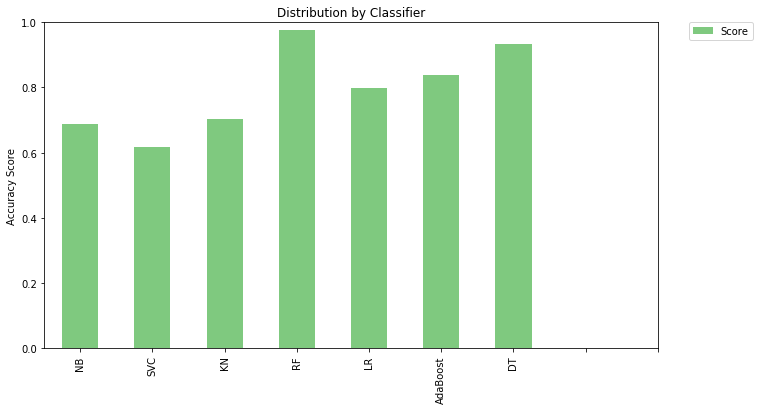

In [49]:
df.plot(kind='bar', ylim=(0,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [53]:
test_pred = rfc.predict(test)

In [54]:
type(test_pred)

numpy.ndarray